# Imports:

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn import tree


# Opening train and test data

In [108]:
X_train_nn=pd.read_csv('/workspaces/Decis_Tree_Diabetes/data/processed/X_train_nn.csv')
X_test_nn=pd.read_csv('/workspaces/Decis_Tree_Diabetes/data/processed/X_test_nn.csv')

y_train=pd.read_csv("/workspaces/Decis_Tree_Diabetes/data/processed/y_train.txt", header=None)
y_test=pd.read_csv("/workspaces/Decis_Tree_Diabetes/data/processed/y_test.txt", header=None)
#the code above imports y as dataframe, below I convert it to a pd series
y_train=y_train[0]
y_test=y_test[0]

# Optimised decision tree model

Below is the estimation of the optimised decision tree model and its performance metrics are stored to later compare them with the random forest model

In [109]:
dec_tree_opt=load(open('/workspaces/Decis_Tree_Diabetes/models/dt_log_loss_depth3_minsampl3_seed42.pk', 'rb'))
dec_tree_opt.fit(X_train_nn, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_split=3,
                       random_state=42)

In [110]:
y_pred = dec_tree_opt.predict(X_test_nn)

## Evaluating model performance

Accuracy:

In [111]:
acc_dec_tree=accuracy_score(y_pred,y_test)

Confusion matrix:

In [112]:
dec_tree_cm = metrics.ConfusionMatrixDisplay(
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred), display_labels = ['NO Diabetes', 'Diabetes']    )

Classification report:

In [113]:
class_report_dt=metrics.classification_report(y_test, y_pred)

# Random forest - Baseline

In [114]:

rf_base=RandomForestClassifier(random_state=42)
rf_base.fit(X_train_nn, y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_pred_train=rf_base.predict(X_train_nn)
y_pred=rf_base.predict(X_test_nn)

## Model performance

Accuracy train vs test data:

The baseline model suggests there is overfitting since the accuracy of the training data is higher than the test data. Neverthless, the baseline accuracy of the random forest is 75%, which is not too low considering this is the baseline model. 

In [116]:
rf_acc_base=accuracy_score(y_pred,y_test)
rf_acc_train=accuracy_score(y_pred_train,y_train)
print('Random forest - Accuracy train: ', rf_acc_train)
print('Random forest - Accuracy test: ', rf_acc_base )

Random forest - Accuracy train:  1.0
Random forest - Accuracy test:  0.7532467532467533


Accuracy optimised decision tree versus baseline random forest:

The accuracy of the baseline random forest (RF) is similar to that of the optimised decision tree (DT). This result corroborates the aim of a random forest, e.g., by generating multiple DTs, the RF obtains a more accurate output. Hence why the non-optimal RF reaches a similar accurate to the optimised DT model. 

In [117]:
print('Random forest baseline accuracy: ', rf_acc_base )
print('Decision tree, optimised, accuracy: ', acc_dec_tree )

Random forest baseline accuracy:  0.7532467532467533
Decision tree, optimised, accuracy:  0.7662337662337663


Storing classification report to later compare it with optimised model

In [118]:
rf_class_rep_base=metrics.classification_report(y_test, y_pred)

# Hyperparameter tunning

Setting hyperparameters, randomised search, and fitting model

In [119]:
hyprms={
    'n_estimators': np.arange(1,100,1),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': np.linspace(0.01, 1, 100, endpoint=False),
    'min_samples_leaf': np.linspace(0.01, 1, 100, endpoint=False),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_depth': np.arange(1,80,1)

}
score=['accuracy', 'f1']

In [120]:
rf_opt=RandomizedSearchCV(rf_base, hyprms, scoring=score, refit='accuracy',n_iter = 500, cv = 5, random_state = 42)

In [121]:
rf_opt.fit(X_train_nn,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=500,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56...
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   random_state=42, refit='accuracy',
                   scoring=['accuracy', 'f1'])

Obtaining best hyperparameters:

In [122]:
best_params=rf_opt.best_params_

# Optimised model

In [123]:
rf_opt=RandomForestClassifier(**best_params, random_state = 42)

In [124]:
rf_opt.fit(X_train_nn, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.06939999999999999,
                       min_samples_split=0.21789999999999998, n_estimators=15,
                       random_state=42)

Saving optmised model

In [125]:
dump(rf_opt, open('/workspaces/Decis_Tree_Diabetes/models/rf_depth30_leaf0.06_split0.2_estim15_seed42.pk', 'wb'))

## Evaluating model performance

**Accuracy train vs test data**

The model accurately diagnoses 78% of the patients. Now, there seems to be no overfitting since both measures of accuracy in train and test data are now much closer.

In [126]:
y_pred_train=rf_opt.predict(X_train_nn)
y_pred=rf_opt.predict(X_test_nn)
rf_acc_opt= accuracy_score(y_pred,y_test)
print('Accuracy train: ', accuracy_score(y_pred_train,y_train))
print('Accuracy test: ', rf_acc_opt)

Accuracy train:  0.7850162866449512
Accuracy test:  0.7857142857142857


**Accuracy random forest vs decision tree:**
The optimised random forest (RF) outperformed in accuracy the baseline and the optimal decision tree models with a 78% accuracy score. The new optimal RF now accurately predicts 78% of the diagnosis. 

In [127]:
print('Accuracy optimised decision tree: ', acc_dec_tree)
print('Accuracy baseline random forest: ', rf_acc_base)
print('Accuracy optimised random forest: ', rf_acc_opt)

Accuracy optimised decision tree:  0.7662337662337663
Accuracy baseline random forest:  0.7532467532467533
Accuracy optimised random forest:  0.7857142857142857


**Confusion matrix:**

The model improved on detecting the patients who do not have diabetes but there are still 23 patients missdiagnosed (3 more, compared to the optimal decision tree).

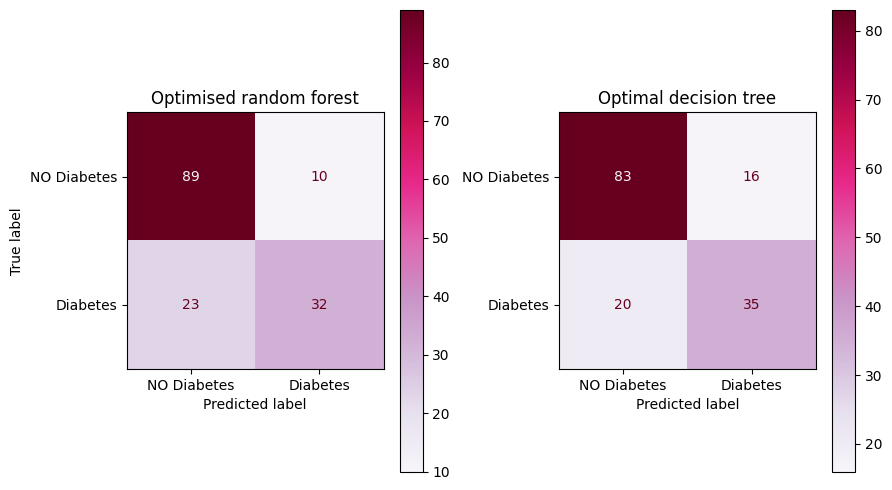

In [129]:
rf_opt_cm = metrics.ConfusionMatrixDisplay(
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred), display_labels = ['NO Diabetes', 'Diabetes']    )
# plot CM
fig, ax= plt.subplots(1,2, figsize=(9,5))
rf_opt_cm.plot(cmap = 'PuRd', ax=ax[0])
ax[0].set_title('Optimised random forest')

dec_tree_cm.plot(cmap = 'PuRd', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Optimal decision tree')

plt.tight_layout()
plt.show()

**Classification report:**

For the class of patients with no-diabetes, the optimised RF performed better than the baseline RF and the optimised DT on recall although there is a mild decline in precision.

For class of patients with diabetes, the optimal RF model improved precision

In [133]:
print('Optimised decision tree clasiffication report: \n', class_report_dt)
print('Baseline random forest clasiffication report: \n', rf_class_rep_base)
print('\n Optimised random forest Clasiffication report: \n', metrics.classification_report(y_test, y_pred))

Optimised decision tree clasiffication report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Baseline random forest clasiffication report: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


 Optimised random forest Clasiffication report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                      